In [1]:
import pandas as pd

In [2]:
auto_df = pd.read_csv('../DataSets/imports-85.data', sep=r'\s*,\s*', engine='python')

In [3]:
auto_df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
#replace ? in data with nan

In [5]:
import numpy as np
auto_df = auto_df.replace('?', np.nan)

In [6]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [16]:
#price is object, has to be converted into float

In [7]:
auto_df['price'] = pd.to_numeric(auto_df['price'], errors='coerce')
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')

In [8]:
# remove normalized-losses column, which is of no use in regression
auto_df = auto_df.drop('normalized-losses', axis=1)

In [20]:
auto_df.head(3)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0


In [24]:
#replace cylinder_dict from categorical to numerical

In [9]:
cylinder_dict = {'two' : 2, 'three': 3, 'four' : 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}

In [10]:
auto_df['num-of-cylinders'].replace(cylinder_dict, inplace=True)

C:\Users\ST\AppData\Local\Temp\ipykernel_25584\2299855884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  auto_df['num-of-cylinders'].replace(cylinder_dict, inplace=True)
C:\Users\ST\AppData\Local\Temp\ipykernel_25584\2299855884.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  auto_df['num-of

In [25]:
#use one hot encoding to convert categorical columns to numerical

In [11]:
autodf = pd.get_dummies(auto_df, columns=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','fuel-system'])

In [12]:
autodf.head(3)

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,True,False,False,False,False,False,False,True,False,False


In [35]:
# remove na rows

In [31]:
autodf.shape

(205, 69)

In [13]:
autodf = autodf.dropna()

In [34]:
autodf.shape

(195, 69)

In [14]:
autodf.isnull().sum()

symboling           0
wheel-base          0
length              0
width               0
height              0
                   ..
fuel-system_idi     0
fuel-system_mfi     0
fuel-system_mpfi    0
fuel-system_spdi    0
fuel-system_spfi    0
Length: 69, dtype: int64

In [40]:
#split data set to train, test instances

In [15]:
from sklearn.model_selection import train_test_split
x = autodf.drop('price', axis=1)
y = autodf['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
linear_model = LinearRegression()

In [47]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [48]:
linear_model.score(x_train, y_train)

0.967922737092433

In [51]:
# all the inout feaures, weights (intercepts) of the linear regression line
linear_model.coef_

array([-5.80061464e+02,  3.06874682e+02, -1.06499194e+02,  1.52236727e+02,
       -5.05771408e+02,  5.30902624e+00, -4.15988710e+03,  2.82885047e+02,
       -1.75044342e+04, -4.49860407e+03, -1.59555122e+03, -4.82296063e+01,
        2.15673623e+00, -6.79852969e+01,  1.73362582e+02, -3.74284422e+03,
        3.71721668e+03,  6.86565908e+03, -4.12474818e+03, -4.48093478e+03,
       -2.94555422e+02, -4.74283895e+03,  3.47319261e+03, -4.08732786e+02,
        3.02841192e+03,  2.30284405e+03, -4.71448781e+03, -6.67651176e+02,
       -8.40276958e+03, -5.25933085e+03,  1.04713265e+04, -3.63797881e-12,
        8.36042927e+03, -4.81543507e+02, -2.06062392e+03,  6.21153583e+01,
        1.09986569e+03,  6.06615966e+03, -6.06615966e+03, -1.38232301e+03,
        1.38232301e+03,  3.37569880e+03,  3.28229109e+03,  2.99875643e+03,
       -1.00643481e+03, -1.20820627e+03, -3.92414032e+02, -3.91701310e+02,
       -4.99487338e+02, -6.59140532e+02,  1.15862787e+03, -2.46748485e+03,
        2.46748485e+03, -

In [52]:
#feature and their weights, positive ones at bottom increase the price of car, negative ones at top are inversely correlated

In [50]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

bore               -17504.434184
make_peugot         -8402.769583
fuel-type_gas       -6066.159660
make_plymouth       -5259.330848
make_isuzu          -4742.838945
                        ...     
fuel-system_idi      6066.159660
fuel-type_diesel     6066.159660
make_bmw             6865.659076
make_saab            8360.429269
make_porsche        10471.326516
Length: 68, dtype: float64


In [53]:
y_predict = linear_model.predict(x_test)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


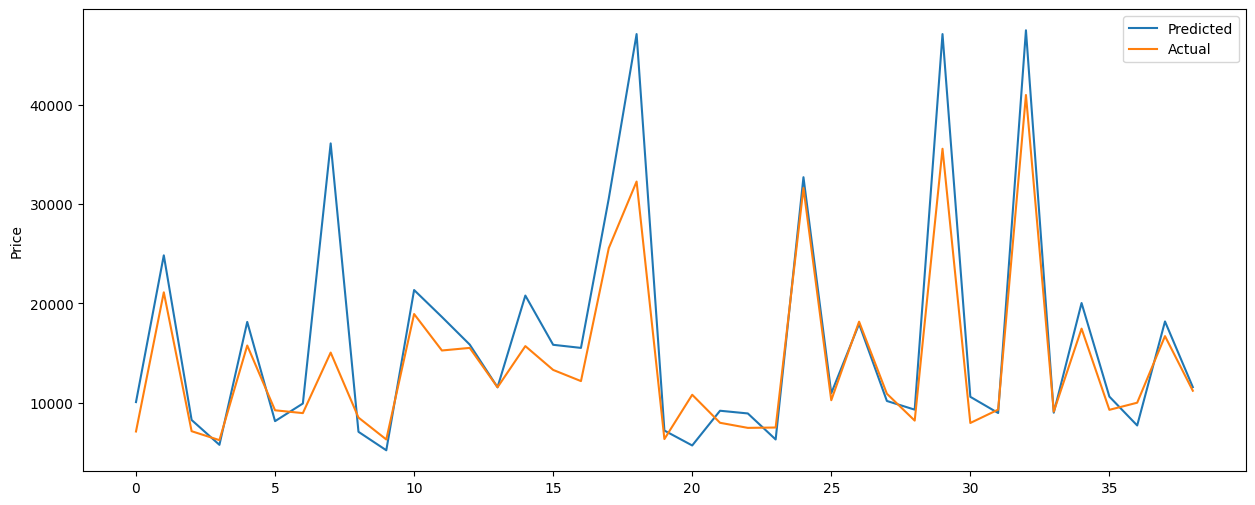

In [54]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')
plt.legend()
plt.show()

In [55]:
r_square = linear_model.score(x_test, y_test)

In [56]:
r_square

0.6322583416111118

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
lienar_model_mse = mean_squared_error(y_predict, y_test)
lienar_model_mse

26099937.604382712

In [61]:
#rmse tells who much predicted value is away from actual value, in below example predicted price is 5000 +/- from actual price

In [60]:
import math
rmse = math.sqrt(lienar_model_mse)
rmse

5108.809803112924

In [62]:
# lasso Regression

In [66]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.7, max_iter=5000)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.7, max_iter=5000)

In [67]:
lasso_model.score(x_train, y_train)

0.9676761933863024

In [68]:
y_predict = lasso_model.predict(x_test)

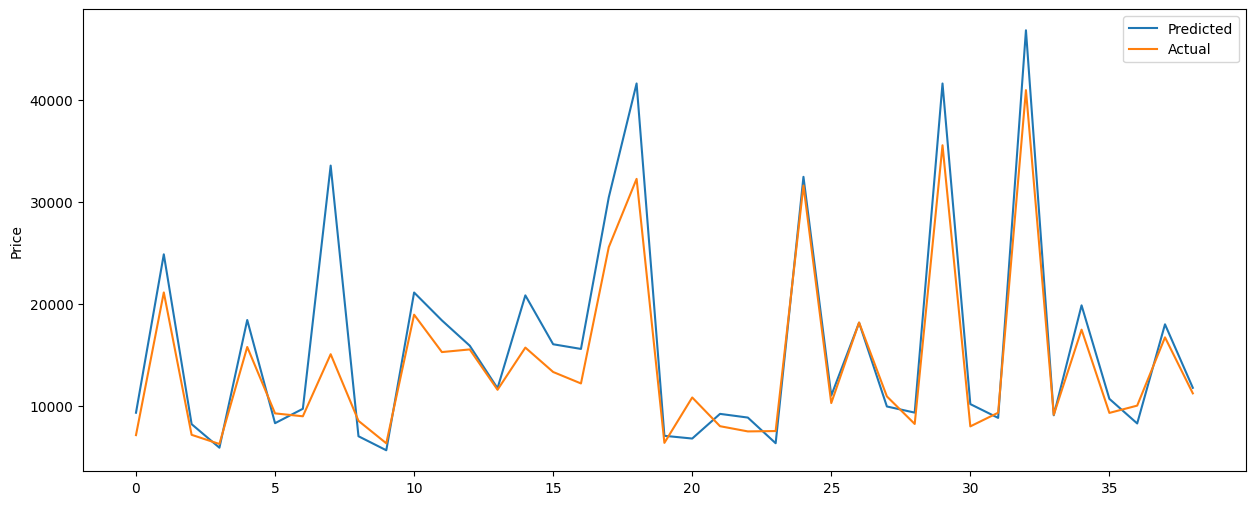

In [69]:
pylab.rcParams['figure.figsize'] = (15,6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')
plt.legend()
plt.show()

In [70]:
r_square = lasso_model.score(x_test, y_test)
r_square

0.7618644248957314

In [71]:
# Ridge regression

In [72]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.7, max_iter=5000)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.7, max_iter=5000)

In [74]:
ridge_model.score(x_train, y_train)

0.9575703930947941

In [76]:
y_predict = ridge_model.predict(x_test)

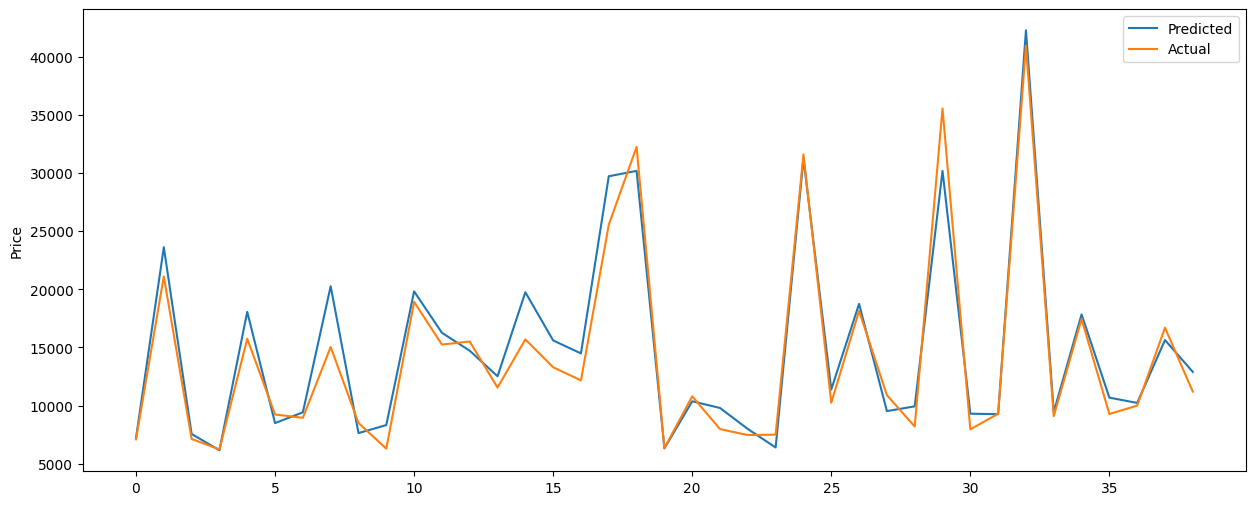

In [77]:
pylab.rcParams['figure.figsize'] = (15,6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')
plt.legend()
plt.show()

In [78]:
r_square = ridge_model.score(x_test, y_test)
r_square

0.9467547253101679

In [79]:
# SVR regression

In [83]:
auto_data = pd.read_csv("../DataSets/auto-mpg.data", delim_whitespace=True, header=None, names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model','origin','car_name'])

C:\Users\ST\AppData\Local\Temp\ipykernel_23204\784900297.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_data = pd.read_csv("../DataSets/auto-mpg.data", delim_whitespace=True, header=None, names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model','origin','car_name'])


In [94]:
auto_data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,True,False,False


In [84]:
auto_data = auto_data.drop('car_name', axis=1)

In [86]:
auto_data['origin'] = auto_data['origin'].replace({1: 'america', 2:'europe', 3:'asia'})

In [ ]:
# one hot encoding

In [90]:
auto_data = pd.get_dummies(auto_data, columns=['origin'])

In [92]:
#replace '?' with nan
import numpy as np
auto_data = auto_data.replace('?', np.nan)

In [93]:
auto_data = auto_data.dropna()

In [95]:
# split to training, test data

In [96]:
from sklearn.model_selection import train_test_split
x = auto_data.drop('mpg', axis=1)
y = auto_data['mpg']

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [111]:
# SVR training, c has to be tuned

In [129]:
from sklearn.svm import SVR
regression = SVR(kernel='linear', C=0.5)
regression.fit(x_train,y_train)

SVR(C=0.5, kernel='linear')

In [113]:
regression.coef_

array([[-0.91314346,  0.02268979,  0.01915072, -0.00724669,  0.21985595,
         0.91803899, -1.6119645 ,  0.40460805,  1.20735645]])

In [130]:
regression.score(x_train,y_train)

0.8087716316059583

In [115]:
y_predict = regression.predict(x_test)

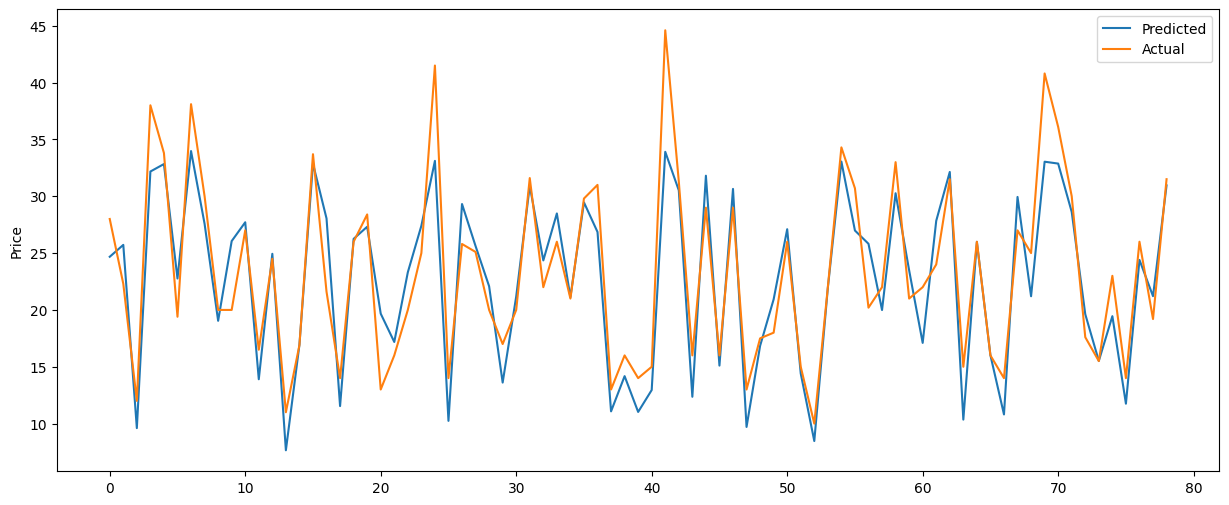

In [116]:
pylab.rcParams['figure.figsize'] = (15,6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')
plt.legend()
plt.show()

In [117]:
regression.score(x_test,y_test)

0.8262845397302738

In [105]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_predict, y_test)

In [106]:
mse

17.469469948804594

In [107]:
import math
rmse = math.sqrt(mse)

In [110]:
# predicted value is 4 miles off from actual values, either in positive or negative direction
rmse

4.179649500712302

In [16]:
# Regression using Gradient boosting, Decision trees

In [27]:
#500 - boosting stages, depth of each learner to 6, node should have atleast 2 samples before we split
# loss can be least square or any other algo
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'huber'}

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gradient = GradientBoostingRegressor(**params)

In [31]:
gradient.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=6,
                          n_estimators=500)

In [32]:
gradient.score(x_train, y_train)

0.997704307497322

In [28]:
y_pred = gradient.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


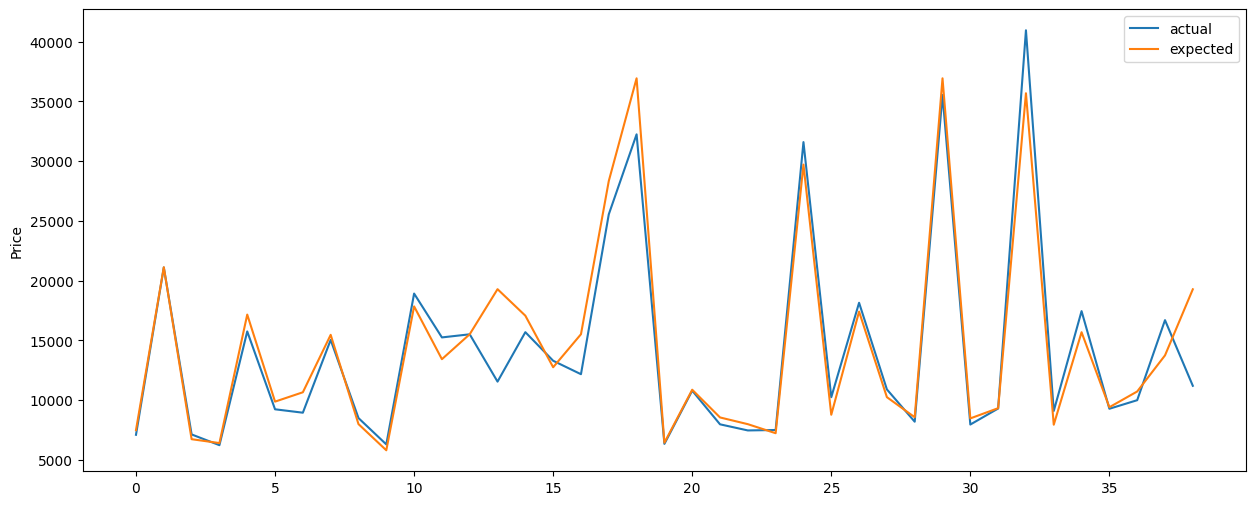

In [36]:
%pylab inline
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (15,6)

plt.plot(y_test.values, label='actual')
plt.plot(y_pred, label='expected')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
# Can pass to grid search for finding optimal hyper parameters